In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc

In [ ]:
# Configurazione per visualizzazioni
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
#CARICAMENTO DATASET
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# Informazioni base sul dataset
print("="*60)
print("DATASET: Breast Cancer Wisconsin (Diagnostic)")
print("="*60)
print(f"Numero di campioni: {X.shape[0]}")
print(f"Numero di feature: {X.shape[1]}")
print(f"Classi: {class_names}")
print(f"\nDistribuzione delle classi:")
print(f"  - Malignant (0): {np.sum(y==0)} campioni ({np.sum(y==0)/len(y)*100:.1f}%)")
print(f"  - Benign (1): {np.sum(y==1)} campioni ({np.sum(y==1)/len(y)*100:.1f}%)")
print(f"\nPrime 5 feature: {list(feature_names[:5])}")


DATASET: Breast Cancer Wisconsin (Diagnostic)
Numero di campioni: 569
Numero di feature: 30
Classi: ['malignant' 'benign']

Distribuzione delle classi:
  - Malignant (0): 212 campioni (37.3%)
  - Benign (1): 357 campioni (62.7%)

Prime 5 feature: [np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness')]


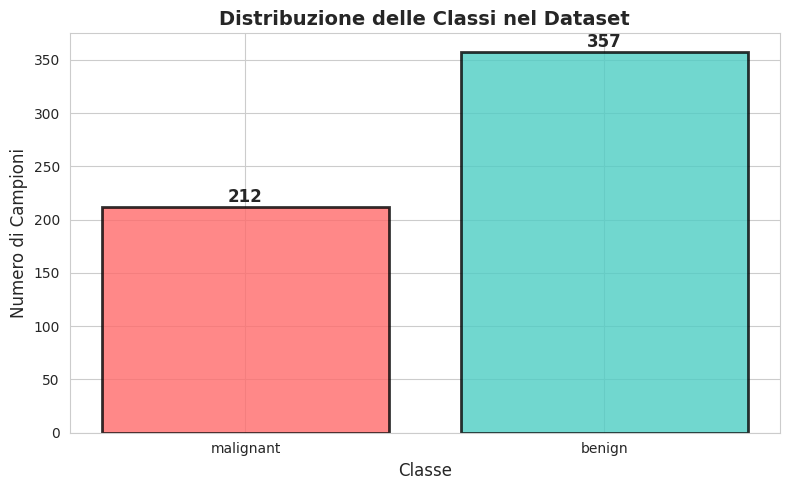

 Differenza classi benigni-maligni: 145 campioni


In [ ]:
#DISTRIBUZIONI DELLE CLASSI
plt.figure(figsize=(8, 5))
colors = ['#FF6B6B', '#4ECDC4']
class_counts = pd.Series(y).value_counts().sort_index()

plt.bar(class_names, class_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
plt.title('Distribuzione delle Classi nel Dataset', fontsize=14, fontweight='bold')
plt.ylabel('Numero di Campioni', fontsize=12)
plt.xlabel('Classe', fontsize=12)

# Aggiungo i valori sopra le barre
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print(f" Differenza classi benigni-maligni: {abs(class_counts[0]-class_counts[1])} campioni")


In [ ]:
# VISUALIZZAZIONE FEATURE
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Statistiche descrittive delle prime 10 feature
print("📊 Statistiche descrittive (prime 10 feature):\n")
print(df.iloc[:, :30].describe().round(2))


📊 Statistiche descrittive (prime 10 feature):

       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
count       569.00        569.00          569.00     569.00           569.00   
mean         14.13         19.29           91.97     654.89             0.10   
std           3.52          4.30           24.30     351.91             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.70         16.17           75.17     420.30             0.09   
50%          13.37         18.84           86.24     551.10             0.10   
75%          15.78         21.80          104.10     782.70             0.11   
max          28.11         39.28          188.50    2501.00             0.16   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count            569.00          569.00               569.00         569.00   
mean               0.10            0.09                 0.05           0.1

In [ ]:
#DIVISIONE TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("="*60)
print("DIVISIONE DATASET")
print("="*60)
print(f"Train: {X_train.shape[0]} campioni ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Test: {X_test.shape[0]} campioni ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

DIVISIONE DATASET
Train: 398 campioni (69.9%)
Test: 171 campioni (30.1%)


In [ ]:
#STANDARDIZZAZIONE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("="*60)
print("STANDARDIZZAZIONE")
print("="*60)
print(f"Media train (prima feature): {X_train_scaled[:, 0].mean():.6f}")
print(f"Std train (prima feature): {X_train_scaled[:, 0].std():.2f}")
print("✅ Standardizzazione completata!")

STANDARDIZZAZIONE
Media train (prima feature): -0.000000
Std train (prima feature): 1.00
✅ Standardizzazione completata!


ANALISI PCA

 Numero totale di feature: 30
Varianza spiegata dalla 1° componente: 45.2%
Varianza spiegata dalle prime 2 componenti: 64.8%
Componenti necessarie per il 95% della varianza: 10


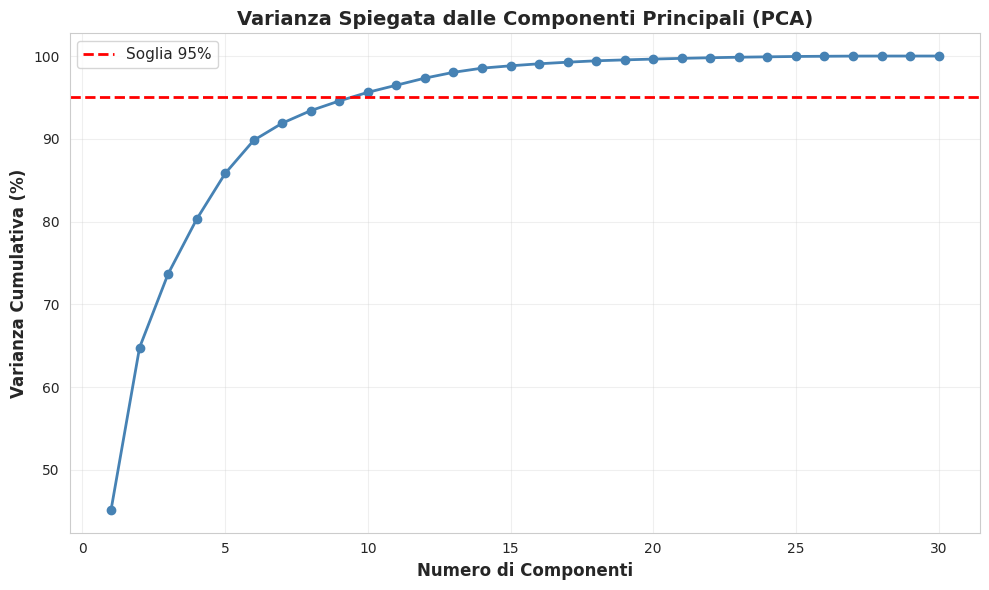

In [ ]:
#PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
#CALCOLO VARIANZA
varianza_spiegata = pca.explained_variance_ratio_
varianza_cumulativa = np.cumsum(varianza_spiegata)

n_comp_95= np.argmax(varianza_cumulativa >= 0.95) + 1
print("="*60)
print("ANALISI PCA")
print("="*60)
print(f"\n Numero totale di feature: 30")
print(f"Varianza spiegata dalla 1° componente: {varianza_spiegata[0]*100:.1f}%")
print(f"Varianza spiegata dalle prime 2 componenti: {varianza_cumulativa[1]*100:.1f}%")
print(f"Componenti necessarie per il 95% della varianza: {n_comp_95}")
#GRAFICO VARIANZA CUMULATIVA
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), varianza_cumulativa*100, marker='o', linewidth=2, color='steelblue')
plt.axhline(y=95, color='red', linestyle='--', linewidth=2, label='Soglia 95%')
plt.xlabel('Numero di Componenti', fontsize=12, fontweight='bold')
plt.ylabel('Varianza Cumulativa (%)', fontsize=12, fontweight='bold')
plt.title('Varianza Spiegata dalle Componenti Principali (PCA)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


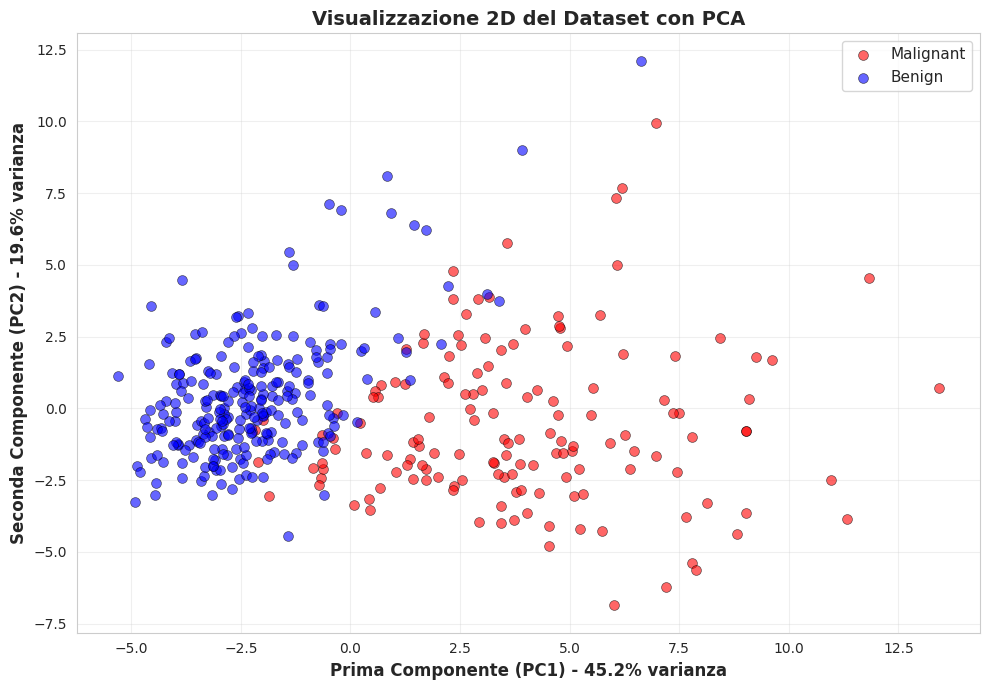


💡 INTERPRETAZIONE:
   Le prime 2 componenti spiegano 64.8% della varianza
   Dal grafico si osserva che le due classi sono ben separate
   Questo suggerisce che i modelli di classificazione funzionano bene


In [ ]:
# PCA con solo 2 componenti per visualizzazione 2D
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_scaled)

# Creo il grafico scatter 2D
plt.figure(figsize=(10, 7))

# Plotto classe Malignant (rosso)
plt.scatter(X_train_2d[y_train==0, 0], X_train_2d[y_train==0, 1],
           c='red', label='Malignant', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Plotto classe Benign (blu)
plt.scatter(X_train_2d[y_train==1, 0], X_train_2d[y_train==1, 1],
           c='blue', label='Benign', alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

plt.xlabel(f'Prima Componente (PC1) - {pca_2d.explained_variance_ratio_[0]*100:.1f}% varianza',
          fontsize=12, fontweight='bold')
plt.ylabel(f'Seconda Componente (PC2) - {pca_2d.explained_variance_ratio_[1]*100:.1f}% varianza',
          fontsize=12, fontweight='bold')
plt.title('Visualizzazione 2D del Dataset con PCA', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 INTERPRETAZIONE:")
print(f"   Le prime 2 componenti spiegano {(pca_2d.explained_variance_ratio_[0] + pca_2d.explained_variance_ratio_[1])*100:.1f}% della varianza")
print(f"   Dal grafico si osserva che le due classi sono {'ben separate' if pca_2d.explained_variance_ratio_[0] > 0.4 else 'parzialmente sovrapposte'}")
print(f"   Questo suggerisce che i modelli di classificazione funzionano bene")


In [ ]:
#TRAINING
print("="*60)
print("TRAINING DEI MODELLI DI CLASSIFICAZIONE")
print("="*60)

#CLASSIFICATORI
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

#ADDESTRAMENTO SUL TRAINING SET
nb_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

print("\nTutti i 4 modelli sono stati addestrati con successo!")


TRAINING DEI MODELLI DI CLASSIFICAZIONE

Tutti i 4 modelli sono stati addestrati con successo!


In [ ]:
# RISULTATI
risultati = {}

#MODELLI CLASSIFICATORI
modelli = {
    'Naive Bayes': nb_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}

print("="*60)
print("VALUTAZIONE DEI MODELLI SUL TEST SET")
print("="*60)

#CALCOLO METRICHE
for nome, modello in modelli.items():
    y_pred = modello.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #ROC AUC
    if hasattr(modello, 'predict_proba'):
        y_proba = modello.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modello.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    #SALVATAGGIO RISULTATI
    risultati[nome] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'fpr': fpr,
        'tpr': tpr
    }

    #RISULTATI CON PERCENTUALI
    print(f"\n {nome}:")
    print(f"   Accuracy:  {acc:.4f} = {acc*100:.2f}%")
    print(f"   Precision: {prec:.4f} = {prec*100:.2f}%")
    print(f"   Recall:    {rec:.4f} = {rec*100:.2f}%")
    print(f"   F1-Score:  {f1:.4f} = {f1*100:.2f}%")
    print(f"   ROC AUC:   {roc_auc:.4f} = {roc_auc*100:.2f}%")

VALUTAZIONE DEI MODELLI SUL TEST SET

 Naive Bayes:
   Accuracy:  0.9357 = 93.57%
   Precision: 0.9364 = 93.64%
   Recall:    0.9626 = 96.26%
   F1-Score:  0.9493 = 94.93%
   ROC AUC:   0.9892 = 98.92%

 Decision Tree:
   Accuracy:  0.9181 = 91.81%
   Precision: 0.9346 = 93.46%
   Recall:    0.9346 = 93.46%
   F1-Score:  0.9346 = 93.46%
   ROC AUC:   0.9126 = 91.26%

 Random Forest:
   Accuracy:  0.9357 = 93.57%
   Precision: 0.9444 = 94.44%
   Recall:    0.9533 = 95.33%
   F1-Score:  0.9488 = 94.88%
   ROC AUC:   0.9913 = 99.13%

 SVM:
   Accuracy:  0.9766 = 97.66%
   Precision: 0.9813 = 98.13%
   Recall:    0.9813 = 98.13%
   F1-Score:  0.9813 = 98.13%
   ROC AUC:   0.9978 = 99.78%


In [ ]:
#TABELLA RIASSUNTIVA CON PERCENTUALI
tabella_risultati = pd.DataFrame({
    'Modello': list(risultati.keys()),
    'Accuracy': [f"{risultati[m]['accuracy']:.4f} ({risultati[m]['accuracy']*100:.2f}%)" for m in risultati.keys()],
    'Precision': [f"{risultati[m]['precision']:.4f} ({risultati[m]['precision']*100:.2f}%)" for m in risultati.keys()],
    'Recall': [f"{risultati[m]['recall']:.4f} ({risultati[m]['recall']*100:.2f}%)" for m in risultati.keys()],
    'F1-Score': [f"{risultati[m]['f1_score']:.4f} ({risultati[m]['f1_score']*100:.2f}%)" for m in risultati.keys()],
    'ROC AUC': [f"{risultati[m]['roc_auc']:.4f} ({risultati[m]['roc_auc']*100:.2f}%)" for m in risultati.keys()]
})

print("="*60)
print("TABELLA RIASSUNTIVA DELLE METRICHE")
print("="*60)
print(tabella_risultati.to_string(index=False))

#TROVO IL MODELLO MIGLIORE PER ACCURACY
acc_values = [risultati[m]['accuracy'] for m in risultati.keys()]
migliore_idx = acc_values.index(max(acc_values))
migliore = list(risultati.keys())[migliore_idx]
migliore_acc = max(acc_values)

print(f"\nMODELLO MIGLIORE: {migliore}")
print(f"   Accuracy: {migliore_acc:.4f} ({migliore_acc*100:.2f}%)")


TABELLA RIASSUNTIVA DELLE METRICHE
      Modello        Accuracy       Precision          Recall        F1-Score         ROC AUC
  Naive Bayes 0.9357 (93.57%) 0.9364 (93.64%) 0.9626 (96.26%) 0.9493 (94.93%) 0.9892 (98.92%)
Decision Tree 0.9181 (91.81%) 0.9346 (93.46%) 0.9346 (93.46%) 0.9346 (93.46%) 0.9126 (91.26%)
Random Forest 0.9357 (93.57%) 0.9444 (94.44%) 0.9533 (95.33%) 0.9488 (94.88%) 0.9913 (99.13%)
          SVM 0.9766 (97.66%) 0.9813 (98.13%) 0.9813 (98.13%) 0.9813 (98.13%) 0.9978 (99.78%)

MODELLO MIGLIORE: SVM
   Accuracy: 0.9766 (97.66%)


MATRICI DI CONFUSIONE


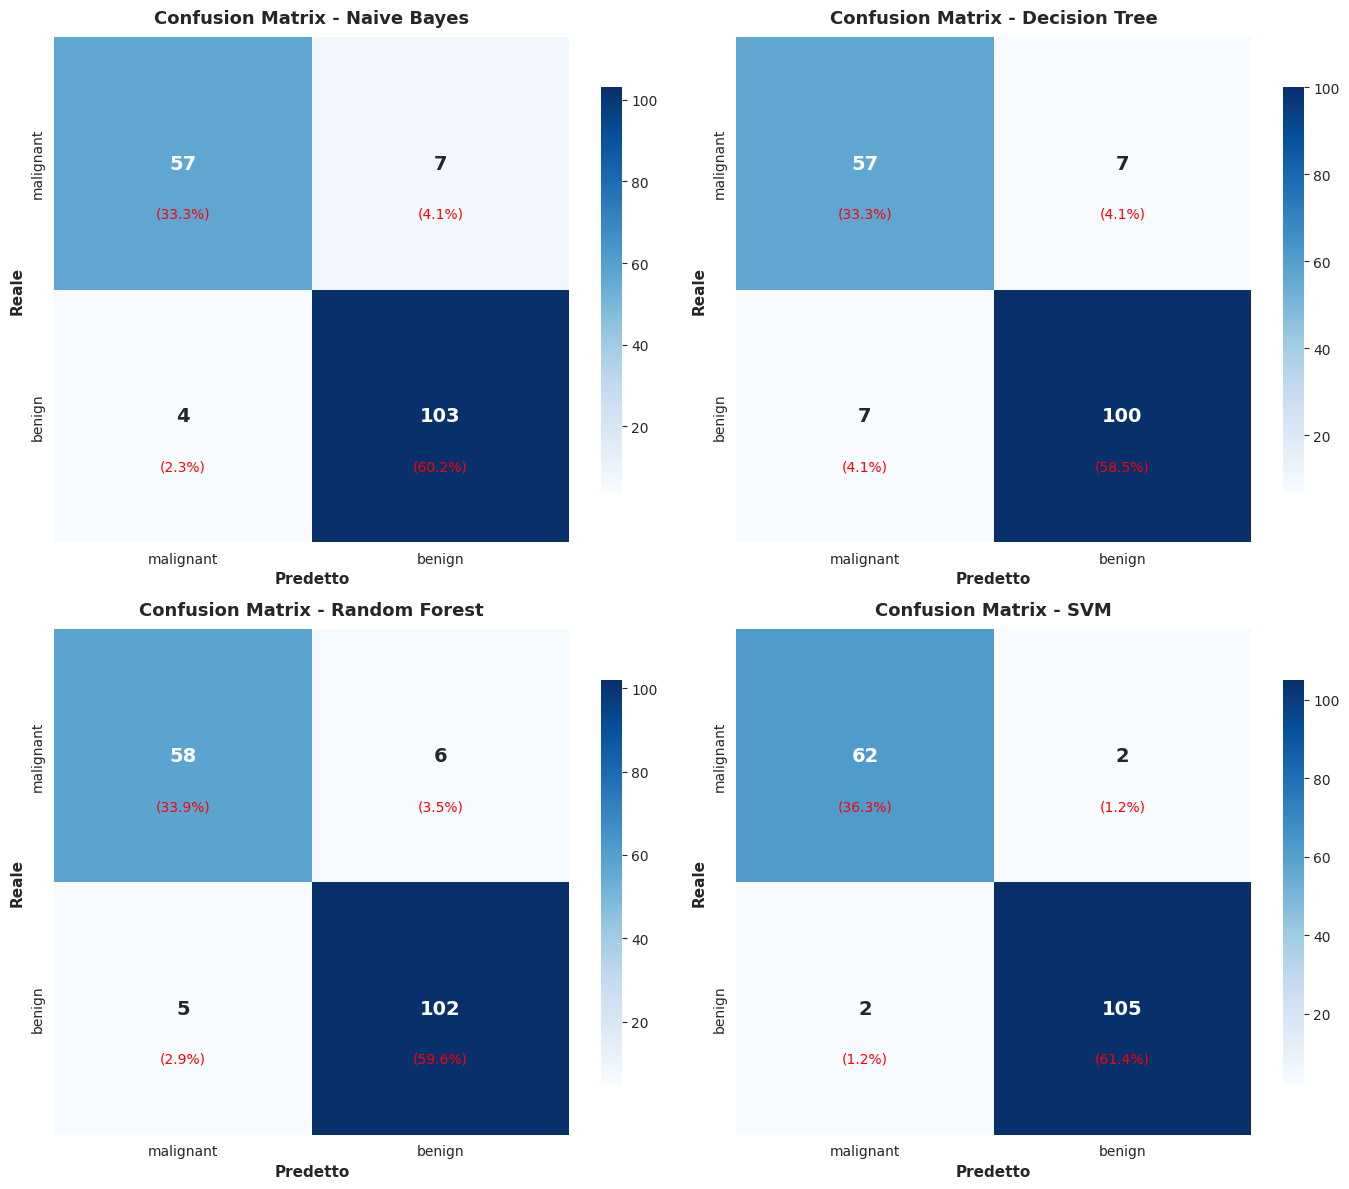


📊 INTERPRETAZIONE MATRICI DI CONFUSIONE:

Naive Bayes:
  • Veri Negativi (TN): 57 - Malignant correttamente identificati
  • Falsi Positivi (FP): 7 - Malignant classificati come Benign (errore)
  • Falsi Negativi (FN): 4 - Benign classificati come Malignant (errore)
  • Veri Positivi (TP): 103 - Benign correttamente identificati
  ➜ Errori totali: 11

Decision Tree:
  • Veri Negativi (TN): 57 - Malignant correttamente identificati
  • Falsi Positivi (FP): 7 - Malignant classificati come Benign (errore)
  • Falsi Negativi (FN): 7 - Benign classificati come Malignant (errore)
  • Veri Positivi (TP): 100 - Benign correttamente identificati
  ➜ Errori totali: 14

Random Forest:
  • Veri Negativi (TN): 58 - Malignant correttamente identificati
  • Falsi Positivi (FP): 6 - Malignant classificati come Benign (errore)
  • Falsi Negativi (FN): 5 - Benign classificati come Malignant (errore)
  • Veri Positivi (TP): 102 - Benign correttamente identificati
  ➜ Errori totali: 11

SVM:
  • Veri Neg

In [ ]:
print("="*60)
print("MATRICI DI CONFUSIONE")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()  # Trasforma in array 1D per iterare facilmente

for idx, (nome, modello) in enumerate(modelli.items()):
    #MATRICE DI CONFUSIONE
    cm = confusion_matrix(y_test, risultati[nome]['y_pred'])

    #HEATMAP
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                ax=axes[idx], cbar_kws={'shrink': 0.8},
                annot_kws={'size': 14, 'weight': 'bold'})

    axes[idx].set_title(f'Confusion Matrix - {nome}',
                       fontsize=13, fontweight='bold', pad=10)
    axes[idx].set_xlabel('Predetto', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Reale', fontsize=11, fontweight='bold')

    # Aggiungo i valori percentuali come testo
    total = cm.sum()
    for i in range(2):
        for j in range(2):
            percentage = (cm[i, j] / total) * 100
            axes[idx].text(j+0.5, i+0.7, f'({percentage:.1f}%)',
                          ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

print("\n📊 INTERPRETAZIONE MATRICI DI CONFUSIONE:\n")
for nome in modelli.keys():
    cm = confusion_matrix(y_test, risultati[nome]['y_pred'])
    tn, fp, fn, tp = cm.ravel()

    print(f"{nome}:")
    print(f"  • Veri Negativi (TN): {tn} - Malignant correttamente identificati")
    print(f"  • Falsi Positivi (FP): {fp} - Malignant classificati come Benign (errore)")
    print(f"  • Falsi Negativi (FN): {fn} - Benign classificati come Malignant (errore)")
    print(f"  • Veri Positivi (TP): {tp} - Benign correttamente identificati")
    print(f"  ➜ Errori totali: {fp + fn}\n")


CURVE ROC


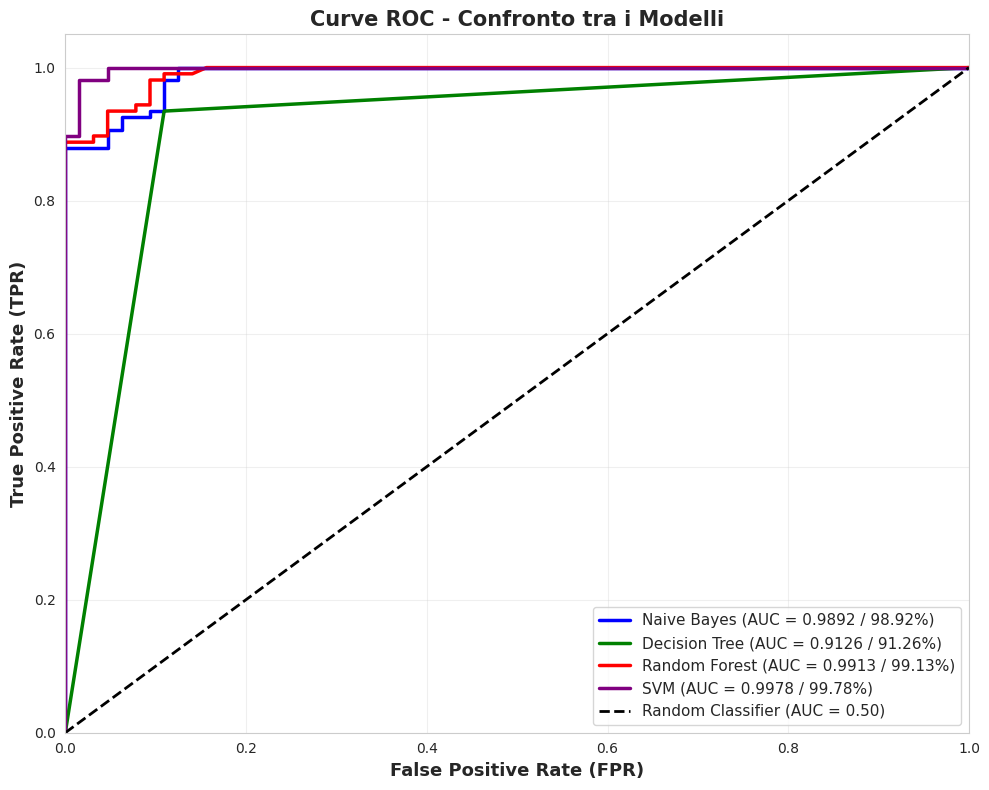

CLASSIFICA PER ROC AUC:
   1. SVM: 0.9978 (99.78%)
   2. Random Forest: 0.9913 (99.13%)
   3. Naive Bayes: 0.9892 (98.92%)
   4. Decision Tree: 0.9126 (91.26%)


In [ ]:
# Visualizzazione delle curve ROC
print("="*60)
print("CURVE ROC")
print("="*60)

# Grafico unico con tutte le curve
plt.figure(figsize=(10, 8))

# Colori diversi per ogni modello
colori = ['blue', 'green', 'red', 'purple']

for idx, (nome, modello) in enumerate(modelli.items()):
    fpr = risultati[nome]['fpr']
    tpr = risultati[nome]['tpr']
    roc_auc = risultati[nome]['roc_auc']

    # Plotto la curva ROC
    plt.plot(fpr, tpr, linewidth=2.5, color=colori[idx],
             label=f'{nome} (AUC = {roc_auc:.4f} / {roc_auc*100:.2f}%)')

# Linea diagonale (classificatore casuale)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate (FPR)', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=13, fontweight='bold')
plt.title('Curve ROC - Confronto tra i Modelli', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()
plt.show()

# Classifica modelli per ROC AUC
roc_ranking = sorted(risultati.items(), key=lambda x: x[1]['roc_auc'], reverse=True)
print("CLASSIFICA PER ROC AUC:")
for rank, (nome, res) in enumerate(roc_ranking, 1):
    print(f"   {rank}. {nome}: {res['roc_auc']:.4f} ({res['roc_auc']*100:.2f}%)")


VISUALIZZAZIONE DECISION TREE


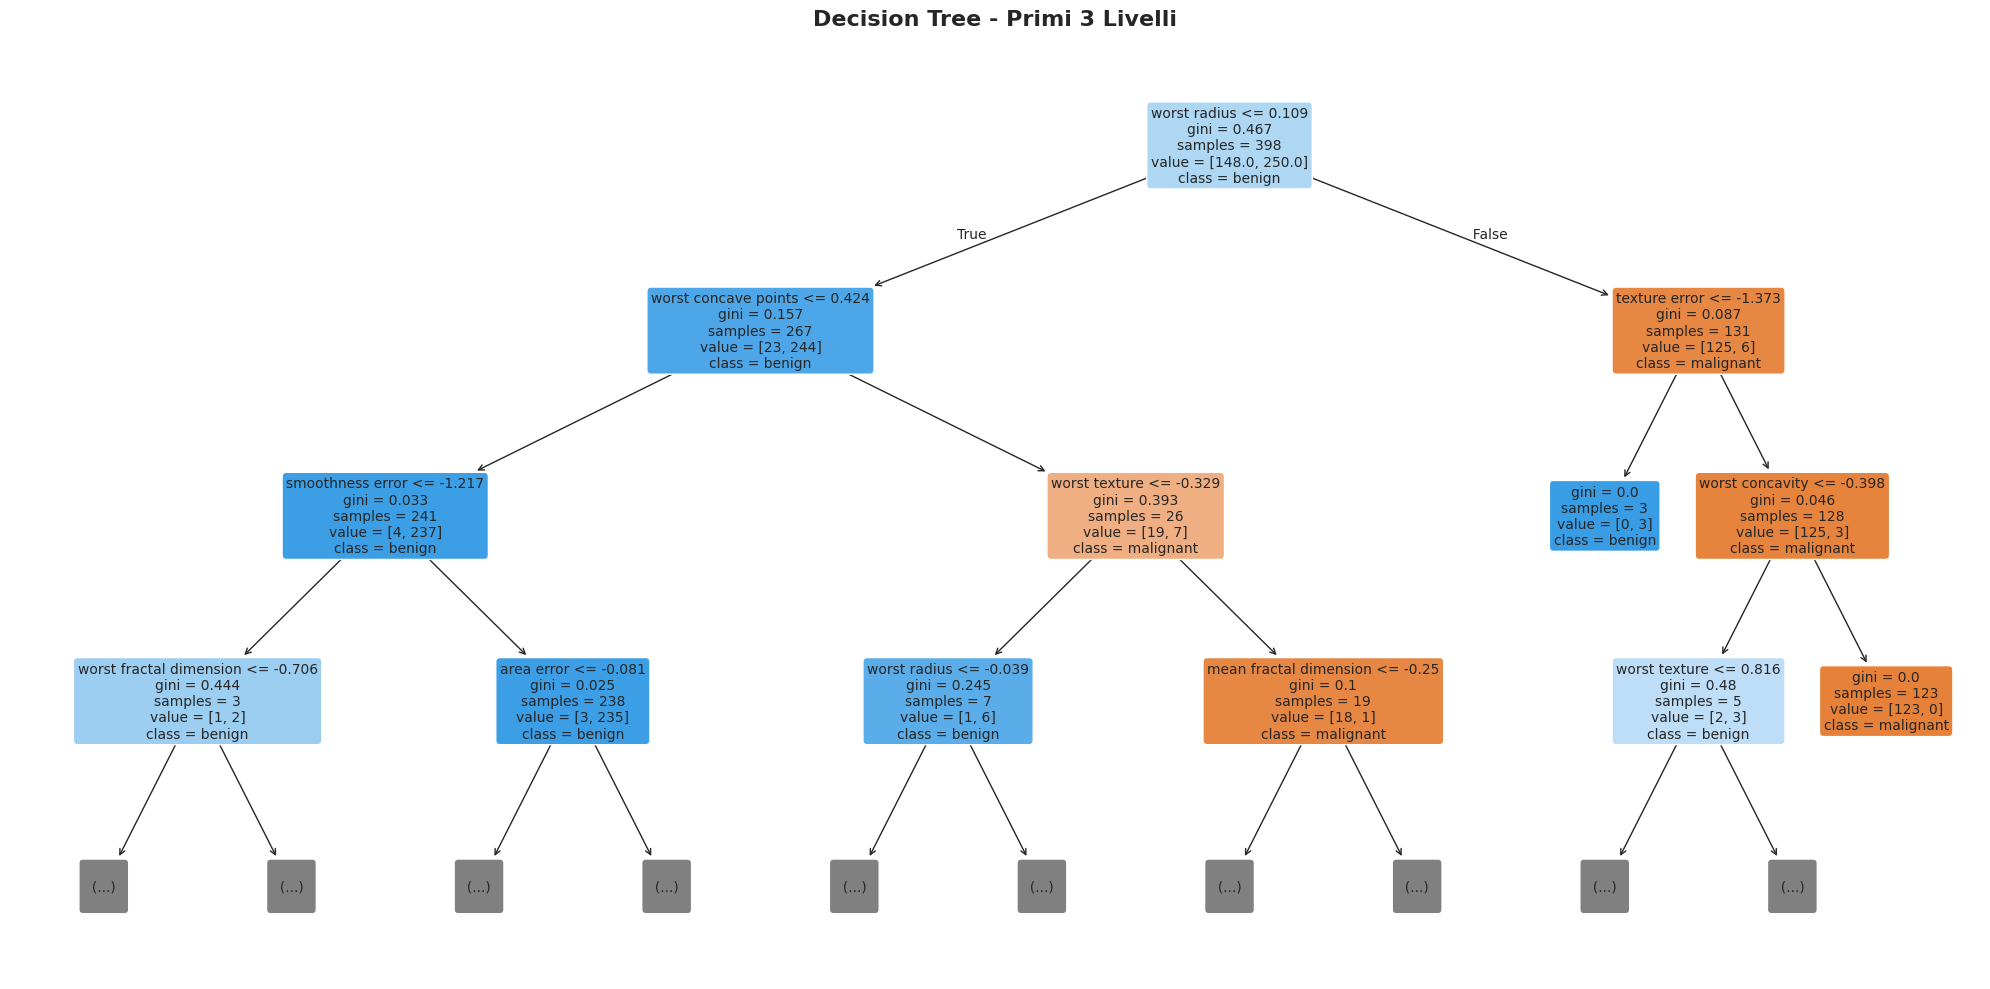


💡 INTERPRETAZIONE:
   L'albero ha 6 livelli di profondità totali
   Numero di nodi (foglie): 16
   Feature più importante: worst radius

   Il grafico mostra solo i primi 3 livelli per leggibilità.
   Ogni nodo mostra: condizione, gini, samples, value, class


In [ ]:
from sklearn.tree import plot_tree

print("="*60)
print("VISUALIZZAZIONE DECISION TREE")
print("="*60)

# Visualizzo l'albero decisionale
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,           # Colora i nodi
          rounded=True,          # Nodi arrotondati
          fontsize=10,
          max_depth=3)           # Mostro solo i primi 3 livelli (altrimenti troppo grande!)

plt.title('Decision Tree - Primi 3 Livelli', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 INTERPRETAZIONE:")
print(f"   L'albero ha {dt_model.get_depth()} livelli di profondità totali")
print(f"   Numero di nodi (foglie): {dt_model.get_n_leaves()}")
print(f"   Feature più importante: {feature_names[dt_model.feature_importances_.argmax()]}")
print("\n   Il grafico mostra solo i primi 3 livelli per leggibilità.")
print("   Ogni nodo mostra: condizione, gini, samples, value, class")

VISUALIZZAZIONE DI UN ALBERO DAL RANDOM FOREST


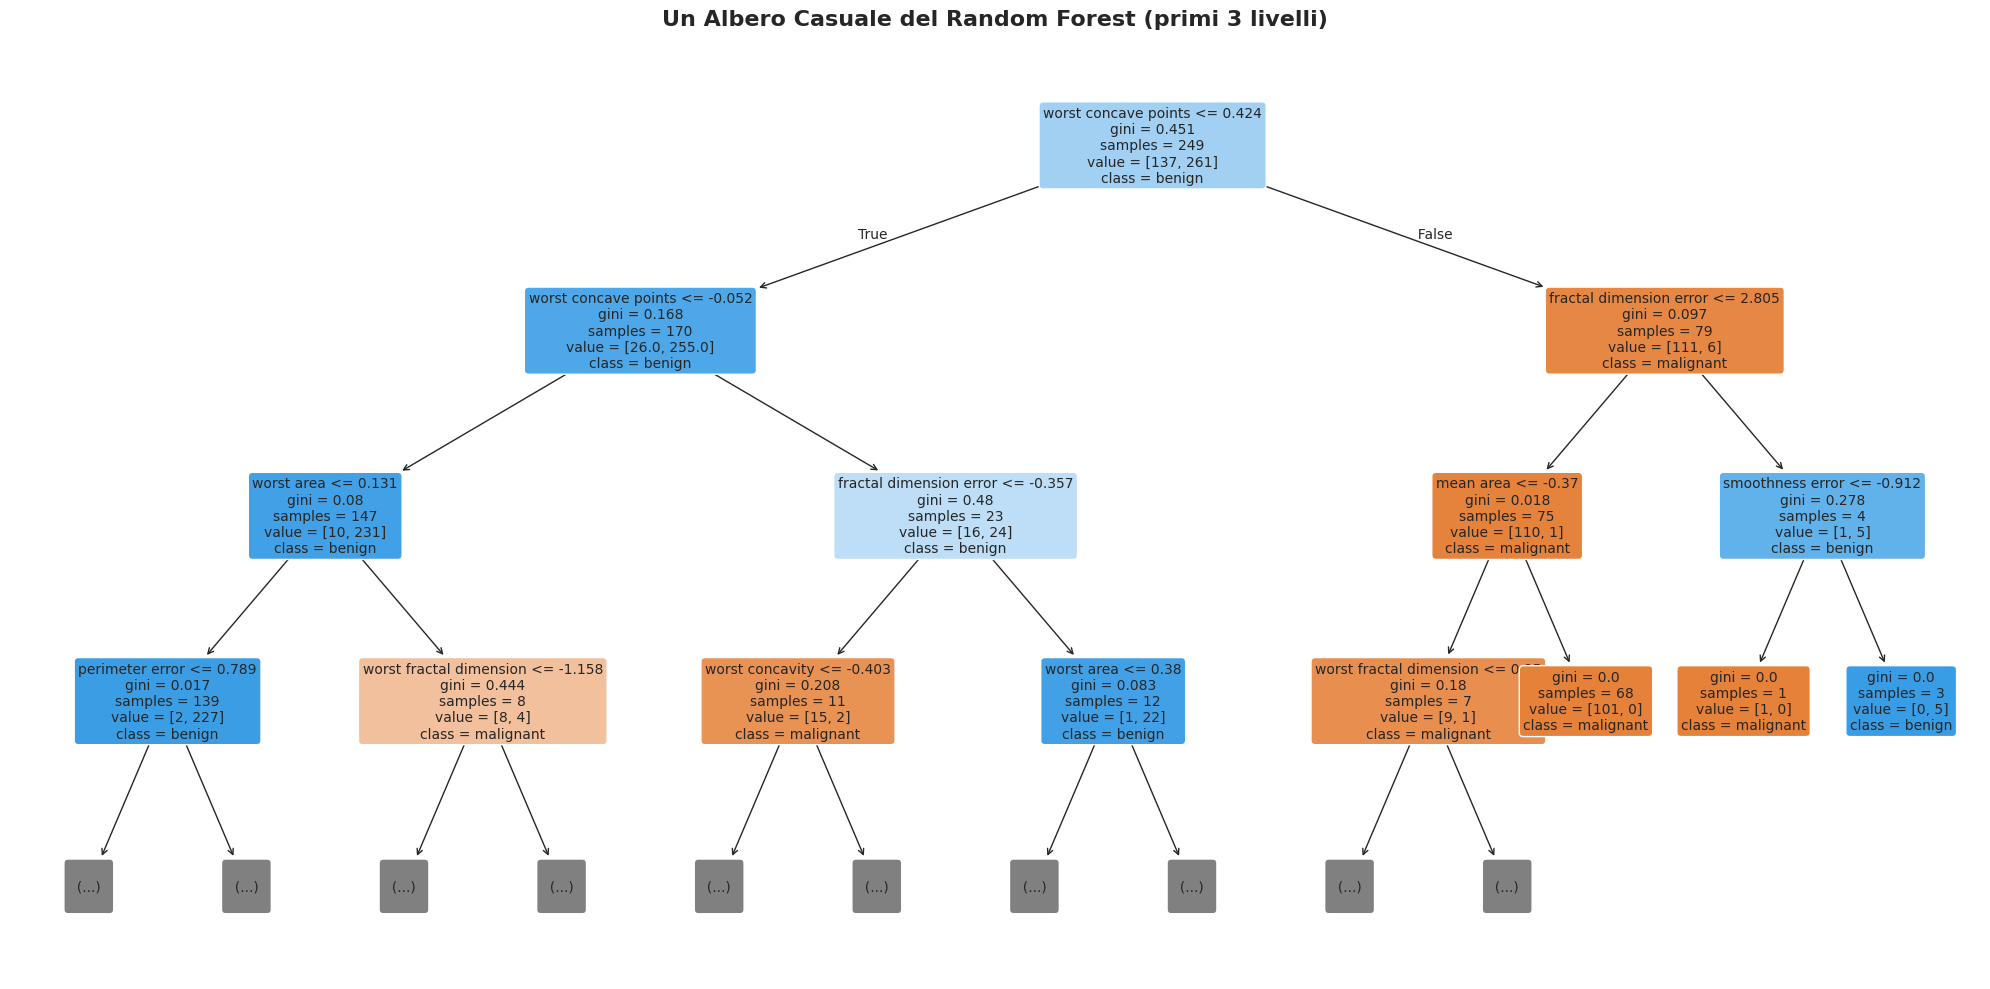


💡 INFO:
   Il Random Forest contiene 100 alberi totali
   Questo è solo l'albero #1
   Ogni albero è diverso perché addestrato su sottoinsiemi casuali dei dati
   La predizione finale è la MEDIA delle predizioni di tutti i 100 alberi


In [ ]:
# Visualizzo UN albero casuale dal Random Forest
print("="*60)
print("VISUALIZZAZIONE DI UN ALBERO DAL RANDOM FOREST")
print("="*60)

# Il Random Forest ha 100 alberi, ne visualizzo uno
albero_sample = rf_model.estimators_[0]  # Primo albero del forest

plt.figure(figsize=(20, 10))
plot_tree(albero_sample,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Solo primi 3 livelli

plt.title('Un Albero Casuale del Random Forest (primi 3 livelli)',
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"\n💡 INFO:")
print(f"   Il Random Forest contiene {len(rf_model.estimators_)} alberi totali")
print(f"   Questo è solo l'albero #1")
print(f"   Ogni albero è diverso perché addestrato su sottoinsiemi casuali dei dati")
print(f"   La predizione finale è la MEDIA delle predizioni di tutti i {len(rf_model.estimators_)} alberi")


CONFRONTO FEATURE IMPORTANCE: DT vs RF


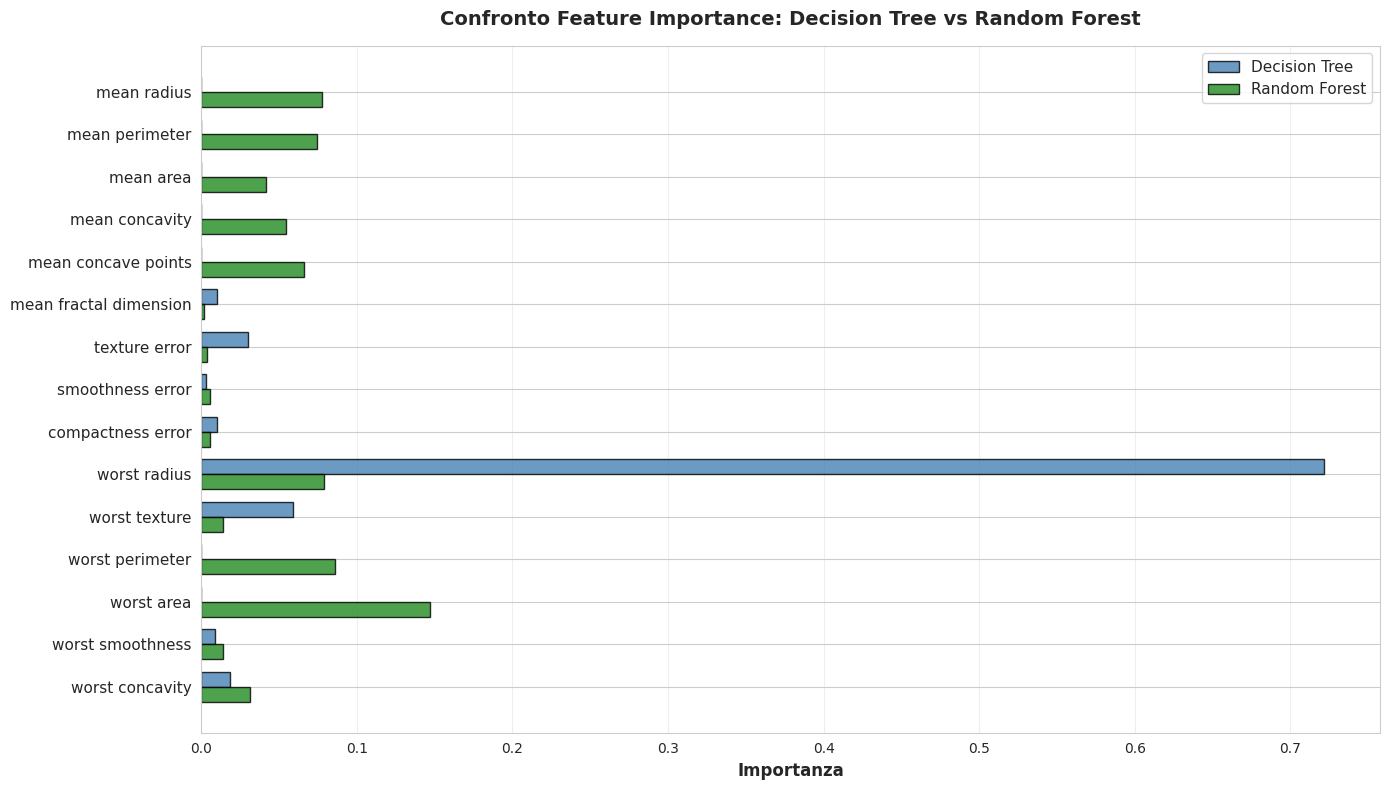


 CONFRONTO:
   Feature più importante per Decision Tree: worst radius
   Feature più importante per Random Forest: worst concave points

   Correlazione tra le importanze (Spearman): 0.014
   → I due modelli hanno visioni diverse sulle feature importanti 


In [ ]:
# Confronto tra Decision Tree e Random Forest
print("="*60)
print("CONFRONTO FEATURE IMPORTANCE: DT vs RF")
print("="*60)
importances_dt = dt_model.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1][:15]
importances_rf = rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1][:15]

# Prendo le top 10 feature comuni
top_features = sorted(set(list(indices_dt[:10]) + list(indices_rf[:10])))[:15]

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(top_features))
width = 0.35

# Barre per Decision Tree
bars1 = ax.barh(x - width/2, [importances_dt[i] for i in top_features],
                width, label='Decision Tree', color='steelblue', edgecolor='black', alpha=0.8)

# Barre per Random Forest
bars2 = ax.barh(x + width/2, [importances_rf[i] for i in top_features],
                width, label='Random Forest', color='forestgreen', edgecolor='black', alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels([feature_names[i] for i in top_features], fontsize=11)
ax.set_xlabel('Importanza', fontsize=12, fontweight='bold')
ax.set_title('Confronto Feature Importance: Decision Tree vs Random Forest',
            fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=11)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

# Statistiche
print("\n CONFRONTO:")
print(f"   Feature più importante per Decision Tree: {feature_names[indices_dt[0]]}")
print(f"   Feature più importante per Random Forest: {feature_names[indices_rf[0]]}")

# Correlazione tra le importanze
from scipy.stats import spearmanr
corr, pval = spearmanr(importances_dt, importances_rf)
print(f"\n   Correlazione tra le importanze (Spearman): {corr:.3f}")
if corr > 0.7:
    print("   → I due modelli concordano sulle feature importanti! ")
else:
    print("   → I due modelli hanno visioni diverse sulle feature importanti ")

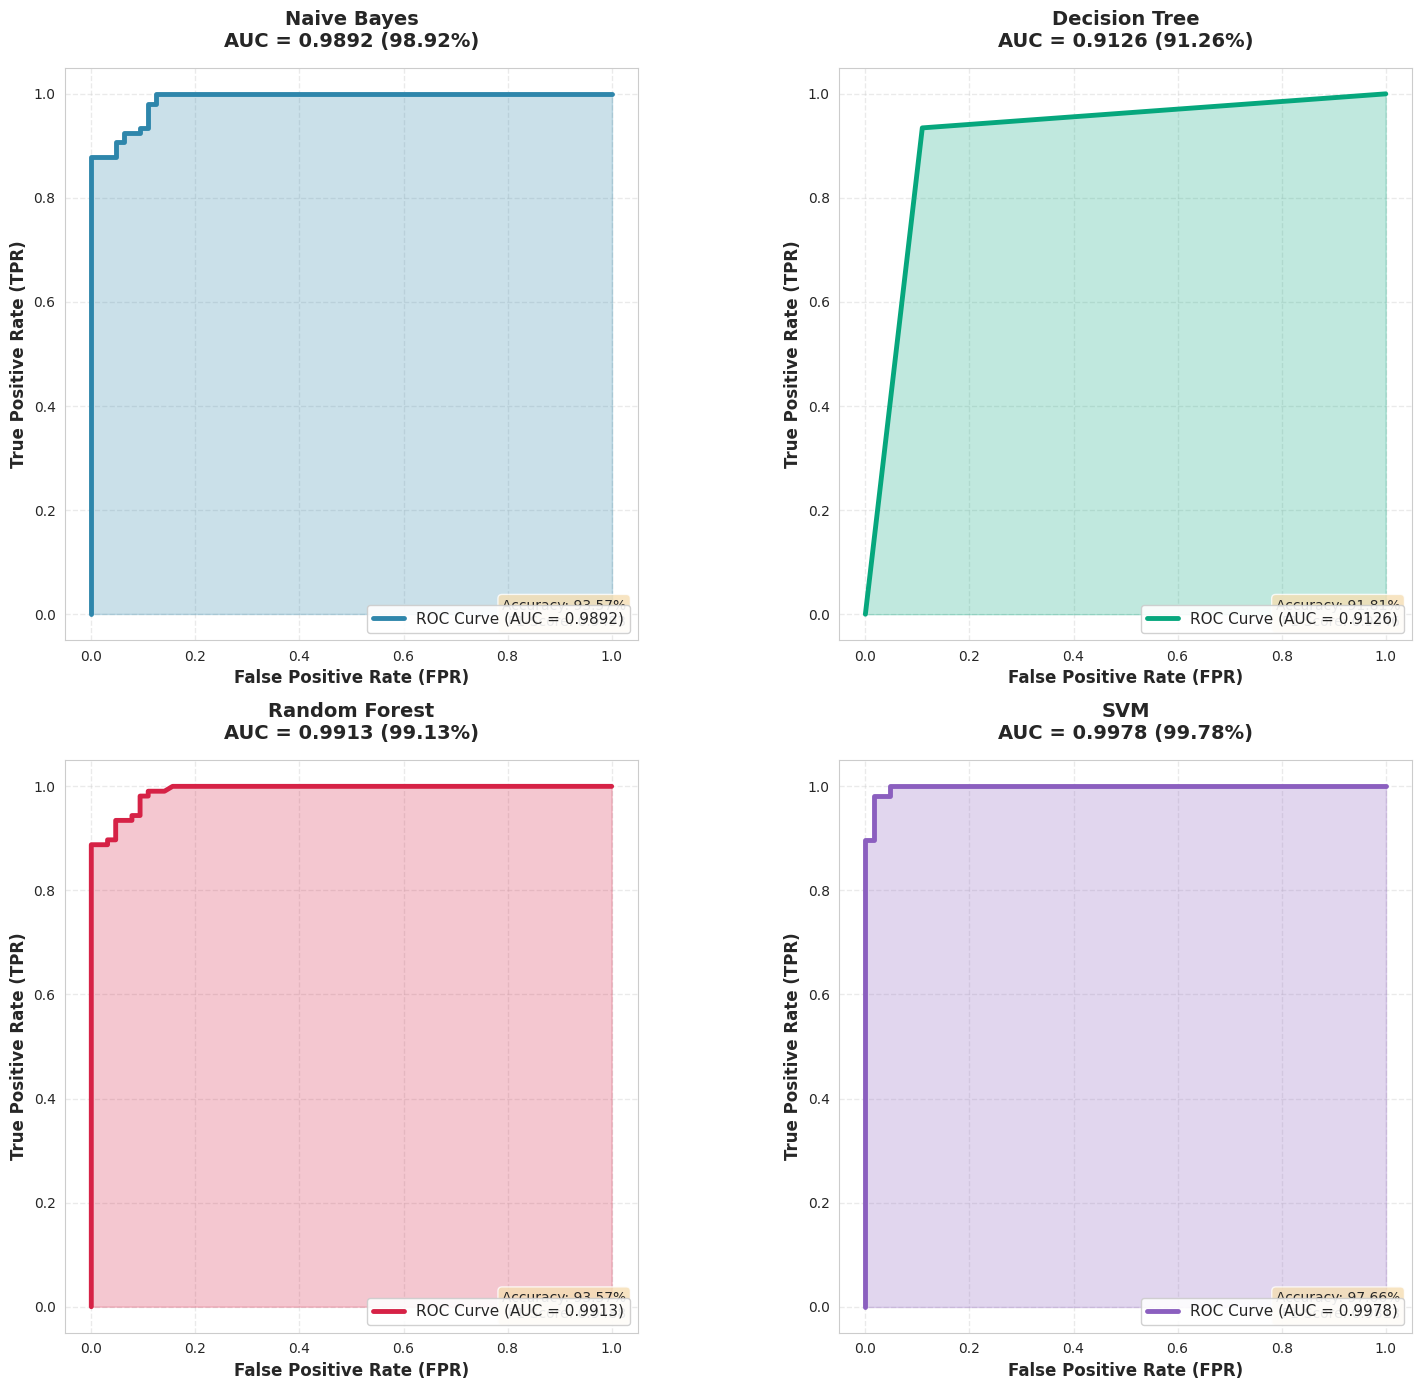

In [ ]:
# Grafici ROC
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

colori = ['#2E86AB', '#06A77D', '#D62246', '#8B5FBF']

for idx, (nome, modello) in enumerate(modelli.items()):
    fpr = risultati[nome]['fpr']
    tpr = risultati[nome]['tpr']
    roc_auc = risultati[nome]['roc_auc']

    # Plotto SOLO la curva ROC
    axes[idx].plot(fpr, tpr, linewidth=3.5, color=colori[idx],
                  label=f'ROC Curve (AUC = {roc_auc:.4f})', zorder=3)

    # Riempio l'area sotto la curva
    axes[idx].fill_between(fpr, tpr, alpha=0.25, color=colori[idx], zorder=1)

    # Etichette e titolo
    axes[idx].set_xlabel('False Positive Rate (FPR)', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Positive Rate (TPR)', fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{nome}\nAUC = {roc_auc:.4f} ({roc_auc*100:.2f}%)',
                       fontsize=14, fontweight='bold', pad=15)

    # Griglia
    axes[idx].grid(True, alpha=0.4, linestyle='--', linewidth=1)

    # Limiti degli assi
    axes[idx].set_xlim([-0.05, 1.05])
    axes[idx].set_ylim([-0.05, 1.05])

    # Legenda
    axes[idx].legend(loc='lower right', fontsize=11, framealpha=0.9)

    # Aspetto quadrato
    axes[idx].set_aspect('equal')

    # Info aggiuntive
    info_text = f"Accuracy: {risultati[nome]['accuracy']*100:.2f}%\nF1-Score: {risultati[nome]['f1_score']:.4f}"
    axes[idx].text(0.98, 0.02, info_text, transform=axes[idx].transAxes,
                  fontsize=10, verticalalignment='bottom', horizontalalignment='right',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

DEEP LEARNING - RETE NEURALE ARTIFICIALE


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


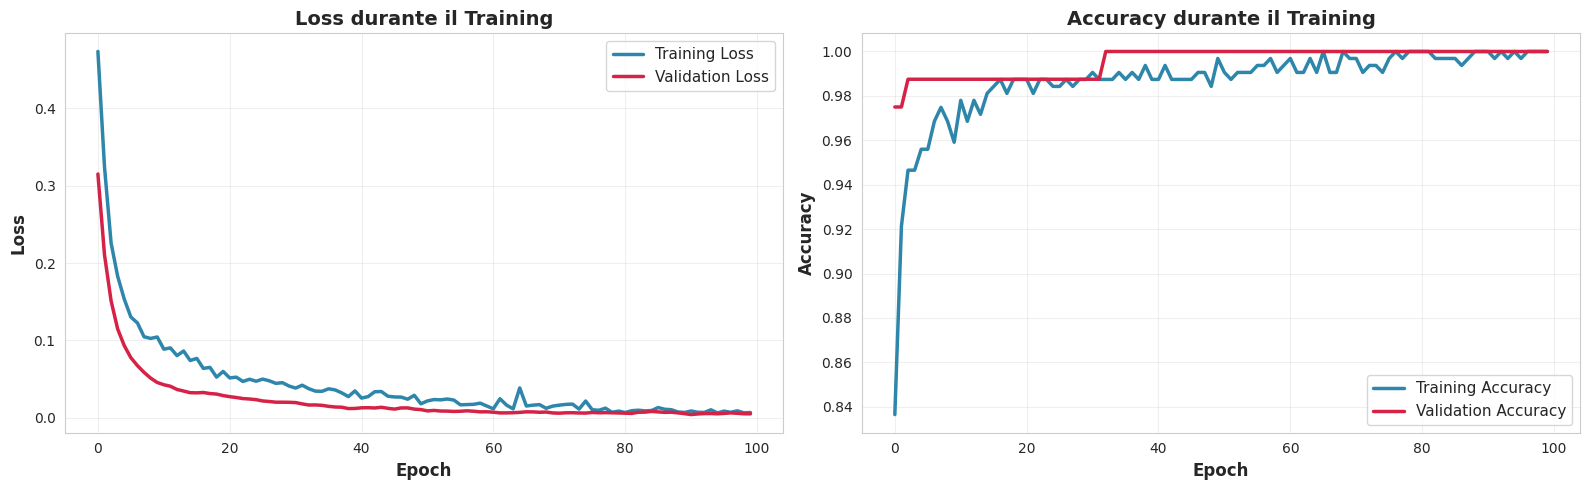


RISULTATI DEEP LEARNING
Accuracy:  0.9708 = 97.08%
Precision: 0.9904 = 99.04%
Recall:    0.9626 = 96.26%
F1-Score:  0.9763 = 97.63%
ROC AUC:   0.9953 = 99.53%


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

print("="*60)
print("DEEP LEARNING - RETE NEURALE ARTIFICIALE")
print("="*60)

# Costruzione della rete neurale
dl_model = Sequential([
    # Input layer + primo hidden layer
    Dense(64, activation='relu', input_shape=(30,), name='Hidden_Layer_1'),
    Dropout(0.2, name='Dropout_1'),

    # Secondo hidden layer
    Dense(32, activation='relu', name='Hidden_Layer_2'),
    Dropout(0.2, name='Dropout_2'),

    # Output layer
    Dense(1, activation='sigmoid', name='Output_Layer')
])

# Compilazione del modello
dl_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping per evitare overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training del modello
history = dl_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # 20% del train set per validation
    epochs=100,
    batch_size=32,
    verbose=0,  # Silenzioso per non riempire l'output
    callbacks=[early_stop]
)

# Grafico Loss e Accuracy durante il training
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Grafico Loss
axes[0].plot(history.history['loss'], linewidth=2.5, label='Training Loss', color='#2E86AB')
axes[0].plot(history.history['val_loss'], linewidth=2.5, label='Validation Loss', color='#D62246')
axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0].set_title('Loss durante il Training', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Grafico Accuracy
axes[1].plot(history.history['accuracy'], linewidth=2.5, label='Training Accuracy', color='#2E86AB')
axes[1].plot(history.history['val_accuracy'], linewidth=2.5, label='Validation Accuracy', color='#D62246')
axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('Accuracy durante il Training', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Predizioni sul test set
y_pred_proba = dl_model.predict(X_test_scaled, verbose=0)
y_pred_dl = (y_pred_proba > 0.5).astype(int).flatten()

# Calcolo metriche
acc_dl = accuracy_score(y_test, y_pred_dl)
prec_dl = precision_score(y_test, y_pred_dl)
rec_dl = recall_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl)

# ROC AUC
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_proba)
roc_auc_dl = auc(fpr_dl, tpr_dl)

# Salvo i risultati
risultati['Deep Learning'] = {
    'accuracy': acc_dl,
    'precision': prec_dl,
    'recall': rec_dl,
    'f1_score': f1_dl,
    'roc_auc': roc_auc_dl,
    'y_pred': y_pred_dl,
    'y_proba': y_pred_proba.flatten(),
    'fpr': fpr_dl,
    'tpr': tpr_dl
}

# Stampo i risultati
print("\n" + "="*60)
print("RISULTATI DEEP LEARNING")
print("="*60)
print(f"Accuracy:  {acc_dl:.4f} = {acc_dl*100:.2f}%")
print(f"Precision: {prec_dl:.4f} = {prec_dl*100:.2f}%")
print(f"Recall:    {rec_dl:.4f} = {rec_dl*100:.2f}%")
print(f"F1-Score:  {f1_dl:.4f} = {f1_dl*100:.2f}%")
print(f"ROC AUC:   {roc_auc_dl:.4f} = {roc_auc_dl*100:.2f}%")
print("="*60)

CONFUSION MATRIX - DEEP LEARNING


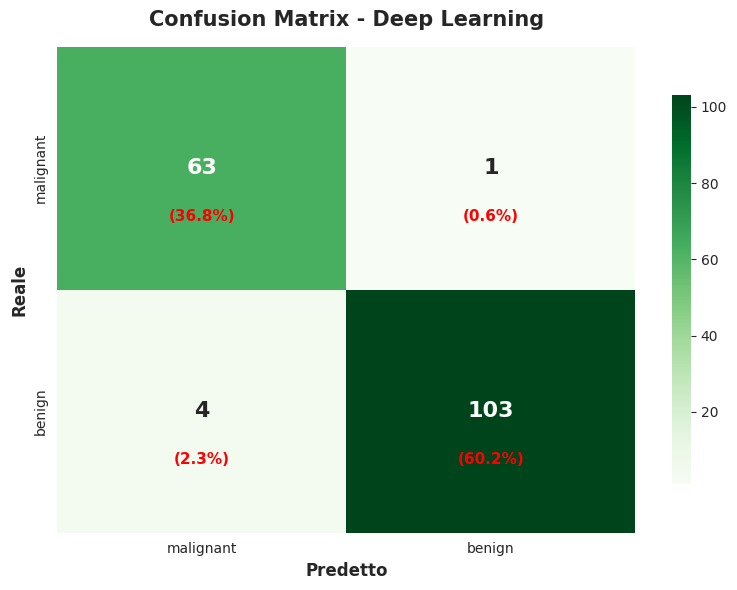


📊 INTERPRETAZIONE:
  • Veri Negativi (TN): 63 - Malignant correttamente identificati
  • Falsi Positivi (FP): 1 - Malignant classificati come Benign (errore)
  • Falsi Negativi (FN): 4 - Benign classificati come Malignant (errore)
  • Veri Positivi (TP): 103 - Benign correttamente identificati
  ➜ Errori totali: 5


In [ ]:
# Matrice di confusione per Deep Learning
print("="*60)
print("CONFUSION MATRIX - DEEP LEARNING")
print("="*60)

cm_dl = confusion_matrix(y_test, y_pred_dl)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 16, 'weight': 'bold'})

plt.title('Confusion Matrix - Deep Learning', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Predetto', fontsize=12, fontweight='bold')
plt.ylabel('Reale', fontsize=12, fontweight='bold')

# Aggiungo percentuali
total = cm_dl.sum()
for i in range(2):
    for j in range(2):
        percentage = (cm_dl[i, j] / total) * 100
        plt.text(j+0.5, i+0.7, f'({percentage:.1f}%)',
                ha='center', va='center', fontsize=11, color='red', weight='bold')

plt.tight_layout()
plt.show()

# Interpretazione
tn, fp, fn, tp = cm_dl.ravel()
print(f"\n📊 INTERPRETAZIONE:")
print(f"  • Veri Negativi (TN): {tn} - Malignant correttamente identificati")
print(f"  • Falsi Positivi (FP): {fp} - Malignant classificati come Benign (errore)")
print(f"  • Falsi Negativi (FN): {fn} - Benign classificati come Malignant (errore)")
print(f"  • Veri Positivi (TP): {tp} - Benign correttamente identificati")
print(f"  ➜ Errori totali: {fp + fn}")


ROC CURVE - DEEP LEARNING


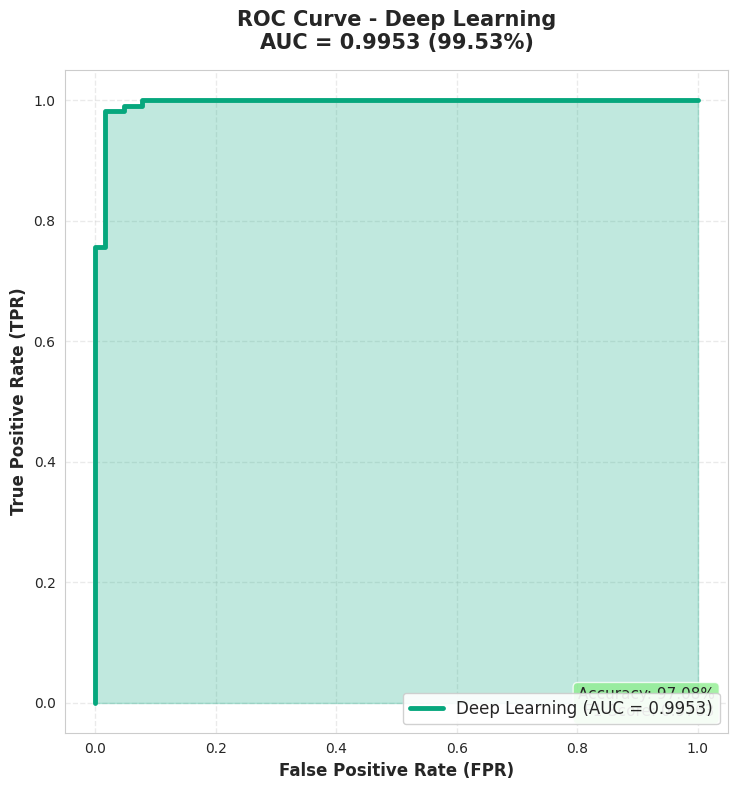

✅ ROC AUC Deep Learning: 0.9953 (99.53%)


In [ ]:
# Curva ROC per Deep Learning
print("="*60)
print("ROC CURVE - DEEP LEARNING")
print("="*60)

plt.figure(figsize=(10, 8))

# Curva ROC del Deep Learning
plt.plot(fpr_dl, tpr_dl, linewidth=3.5, color='#06A77D',
         label=f'Deep Learning (AUC = {roc_auc_dl:.4f})', zorder=3)

# Riempio l'area sotto la curva
plt.fill_between(fpr_dl, tpr_dl, alpha=0.25, color='#06A77D', zorder=1)

plt.xlabel('False Positive Rate (FPR)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (TPR)', fontsize=12, fontweight='bold')
plt.title(f'ROC Curve - Deep Learning\nAUC = {roc_auc_dl:.4f} ({roc_auc_dl*100:.2f}%)',
         fontsize=15, fontweight='bold', pad=15)
plt.grid(True, alpha=0.4, linestyle='--', linewidth=1)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(loc='lower right', fontsize=12, framealpha=0.9)
plt.gca().set_aspect('equal')

# Info aggiuntive
info_text = f"Accuracy: {acc_dl*100:.2f}%\nF1-Score: {f1_dl:.4f}"
plt.text(0.98, 0.02, info_text, transform=plt.gca().transAxes,
        fontsize=11, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"✅ ROC AUC Deep Learning: {roc_auc_dl:.4f} ({roc_auc_dl*100:.2f}%)")


CONFRONTO FINALE - TUTTI I MODELLI
      Modello        Accuracy       Precision          Recall        F1-Score         ROC AUC
  Naive Bayes 0.9357 (93.57%) 0.9364 (93.64%) 0.9626 (96.26%) 0.9493 (94.93%) 0.9892 (98.92%)
Decision Tree 0.9181 (91.81%) 0.9346 (93.46%) 0.9346 (93.46%) 0.9346 (93.46%) 0.9126 (91.26%)
Random Forest 0.9357 (93.57%) 0.9444 (94.44%) 0.9533 (95.33%) 0.9488 (94.88%) 0.9913 (99.13%)
          SVM 0.9766 (97.66%) 0.9813 (98.13%) 0.9813 (98.13%) 0.9813 (98.13%) 0.9978 (99.78%)
Deep Learning 0.9708 (97.08%) 0.9904 (99.04%) 0.9626 (96.26%) 0.9763 (97.63%) 0.9953 (99.53%)

 MODELLO MIGLIORE: SVM
   Accuracy: 0.9766 (97.66%)


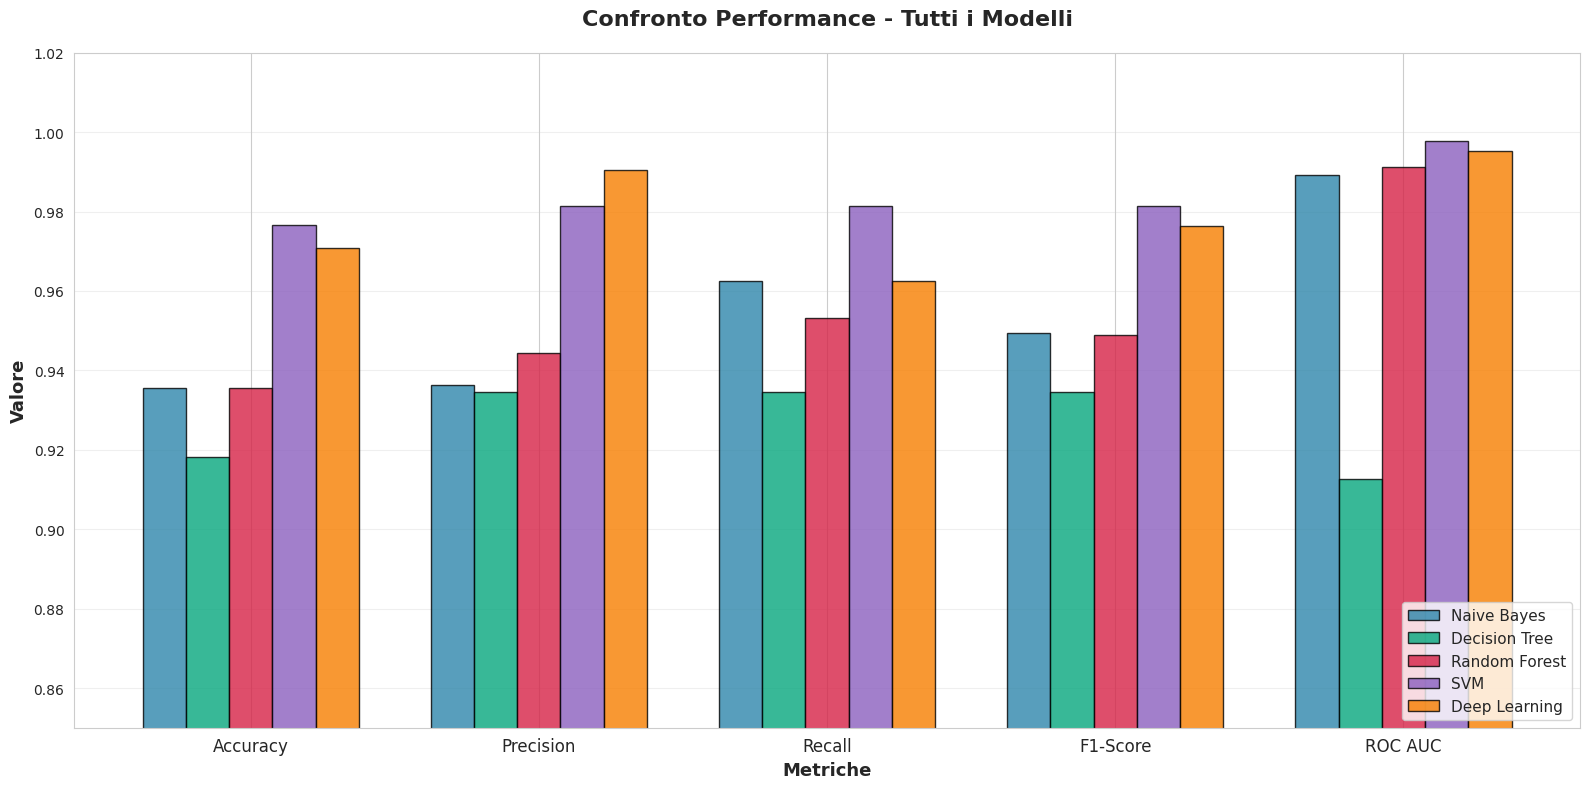

In [ ]:
# Tabella finale con TUTTI i modelli (4 shallow + 1 deep learning)
print("="*60)
print("CONFRONTO FINALE - TUTTI I MODELLI")
print("="*60)

tabella_finale = pd.DataFrame({
    'Modello': list(risultati.keys()),
    'Accuracy': [f"{risultati[m]['accuracy']:.4f} ({risultati[m]['accuracy']*100:.2f}%)" for m in risultati.keys()],
    'Precision': [f"{risultati[m]['precision']:.4f} ({risultati[m]['precision']*100:.2f}%)" for m in risultati.keys()],
    'Recall': [f"{risultati[m]['recall']:.4f} ({risultati[m]['recall']*100:.2f}%)" for m in risultati.keys()],
    'F1-Score': [f"{risultati[m]['f1_score']:.4f} ({risultati[m]['f1_score']*100:.2f}%)" for m in risultati.keys()],
    'ROC AUC': [f"{risultati[m]['roc_auc']:.4f} ({risultati[m]['roc_auc']*100:.2f}%)" for m in risultati.keys()]
})

print(tabella_finale.to_string(index=False))

# Identifico il modello migliore
acc_values = [risultati[m]['accuracy'] for m in risultati.keys()]
migliore_idx = acc_values.index(max(acc_values))
migliore = list(risultati.keys())[migliore_idx]
migliore_acc = max(acc_values)

print(f"\n{'='*60}")
print(f" MODELLO MIGLIORE: {migliore}")
print(f"   Accuracy: {migliore_acc:.4f} ({migliore_acc*100:.2f}%)")
print(f"{'='*60}")

# Grafico a barre comparativo
metriche_nomi = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
x = np.arange(len(metriche_nomi))
width = 0.15

fig, ax = plt.subplots(figsize=(16, 8))

for idx, (nome, colore) in enumerate(zip(risultati.keys(),
                                          ['#2E86AB', '#06A77D', '#D62246', '#8B5FBF', '#F77F00'])):
    metriche_valori = [
        risultati[nome]['accuracy'],
        risultati[nome]['precision'],
        risultati[nome]['recall'],
        risultati[nome]['f1_score'],
        risultati[nome]['roc_auc']
    ]
    ax.bar(x + idx*width, metriche_valori, width, label=nome, color=colore, alpha=0.8, edgecolor='black')

ax.set_xlabel('Metriche', fontsize=13, fontweight='bold')
ax.set_ylabel('Valore', fontsize=13, fontweight='bold')
ax.set_title('Confronto Performance - Tutti i Modelli', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(metriche_nomi, fontsize=12)
ax.legend(loc='lower right', fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.85, 1.02])

plt.tight_layout()
plt.show()
